## K-means in action

Scikit-learn has a module called `cluster` that includes several clustering algorithms including k-means.

### Synthetic data

K-means has an impressive ability to discover isotropic (a.k.a., circular) clusters. We can see this by running k-means on some randomly generated data. We'll randomly sample two normally distributed datasets with different means and then cluster them using k-means. Note that, although the means of the two variables are different, we make their variance the same. This is because k-means works best if the variances in the clusters are the same as we touched upon when we were discussing the assumptions of k-means.

We begin with importing the libraries we use:

In [129]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

Then we define two variables called *cluster_1* and *cluster_2* by randomly sampling from normal distribution. We also standardize them using `StandardScaler` of `sklearn.preprocessing`:

In [130]:
cluster_1x = np.random.normal(10,5,500)
cluster_1y = np.random.normal(20,5,500)
cluster_1 = np.concatenate([cluster_1x.reshape(-1,1),cluster_1y.reshape(-1,1)], axis=1)

cluster_2x = np.random.normal(30,5,500)
cluster_2y = np.random.normal(20,5,500)
cluster_2 = np.concatenate([cluster_2x.reshape(-1,1),cluster_2y.reshape(-1,1)], axis=1)

all_data = np.concatenate([cluster_1,cluster_2],axis=0)

scaler = StandardScaler()
all_data = scaler.fit_transform(all_data)

To apply k-means, we use `KMeans` class from `sklearn.cluster` module. To measure the run time we use [`%timeit` magic command](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-timeit) of iPython:

20.4 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


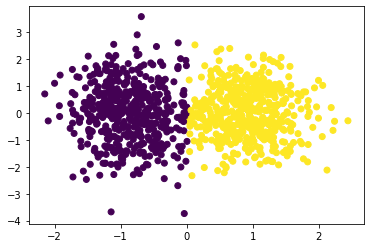

In [131]:
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(all_data)
y_pred = k_means.predict(all_data)

# Plot the solution.
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
plt.show()

Clusters seem to capture the correct grouping in the data and the algorithm took around 17 milliseconds to run. Now, let's try MiniBatchKMeans for comparison:

10.3 ms ± 79.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


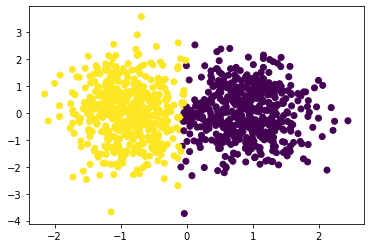

In [132]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=2, random_state=123)
%timeit mini_batch_k_means.fit(all_data)
y_pred_mini = mini_batch_k_means.predict(all_data)

# Plot the solution.
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred_mini)
plt.show()

MiniBatchKMeans also did a great job in less than half the time of the KMeans!

### Iris dataset

Now that we've seen k-means at work on randomly generated data, let's have a look at a real-world dataset. For this example, we'll use the famous [Iris data](https://archive.ics.uci.edu/ml/datasets/iris) from the UC Irvine Machine Learning Repository. This dataset is a standard for exploring clustering and pattern recognition algorithms. It contains data on three types of iris plants, with 50 instances of each type. Among the three classes, one of them is linearly separable from the other two whereas the other two are not linearly separable from one another. 

The names of the iris plants are *Iris Setosa*, *Iris Versicolour*, and *Iris Virginica*. Each plant has four features:

1. Sepal length in cm.
2. Sepal width in cm.
3. Petal length in cm.
4. Petal width in cm.

In this example, our goal will be to create a k-means solution that correctly clusters the three types of iris plants.

Note that in this example we actually know the correct number of clusters in the data: three. But, we'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will not use the information regarding the correct classes of the observations.

One important thing to keep in mind is that resulting clusters depend on the explanatory power of the variables that are fed into the clustering algorithms. In our example, the performance of k-means depends on the predictive power of the variables on identifying the plant type. So, if they are weak in this regard, then k-means won't be able to discern the correct classes.

To load the data, we'll use scikit-learn's `datasets` module. After we import the module (`from sklearn import datasets`), we load the dataset as follows: `iris = datasets.load_iris()`. 

Most of the clustering algorithms are sensitive to the scale of the data. So, before applying k-means, we also standardize our variables using the `StandardScaler` from `sklearn.preprocessing`:

In [133]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

We run k-means by setting `n_clusters=3`, since we have three classes of iris plant types in our data. The first assignment of this checkpoint asks you to play with this parameter and experiment with the results:

13.6 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


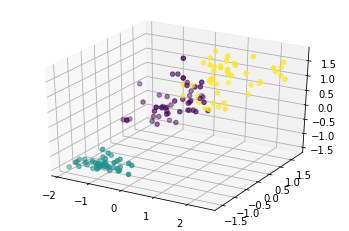

In [134]:
k_means = KMeans(n_clusters=3, random_state=123)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# Plot the solution on arbitrarily chosen axes (3 of the four dimensions)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_std[:,0], X_std[:,2], X_std[:,3], c=y_pred)
plt.show()

Let's visualize the predictions and the true labels of the observations. To plot in two-dimensional space, we need to reduce our data dimensionality. For this purpose, we apply PCA and use the first two principal components.

In the plot below, the numbers show the cluster each observation has been assigned to by the algorithm. The colors denote the true classes.

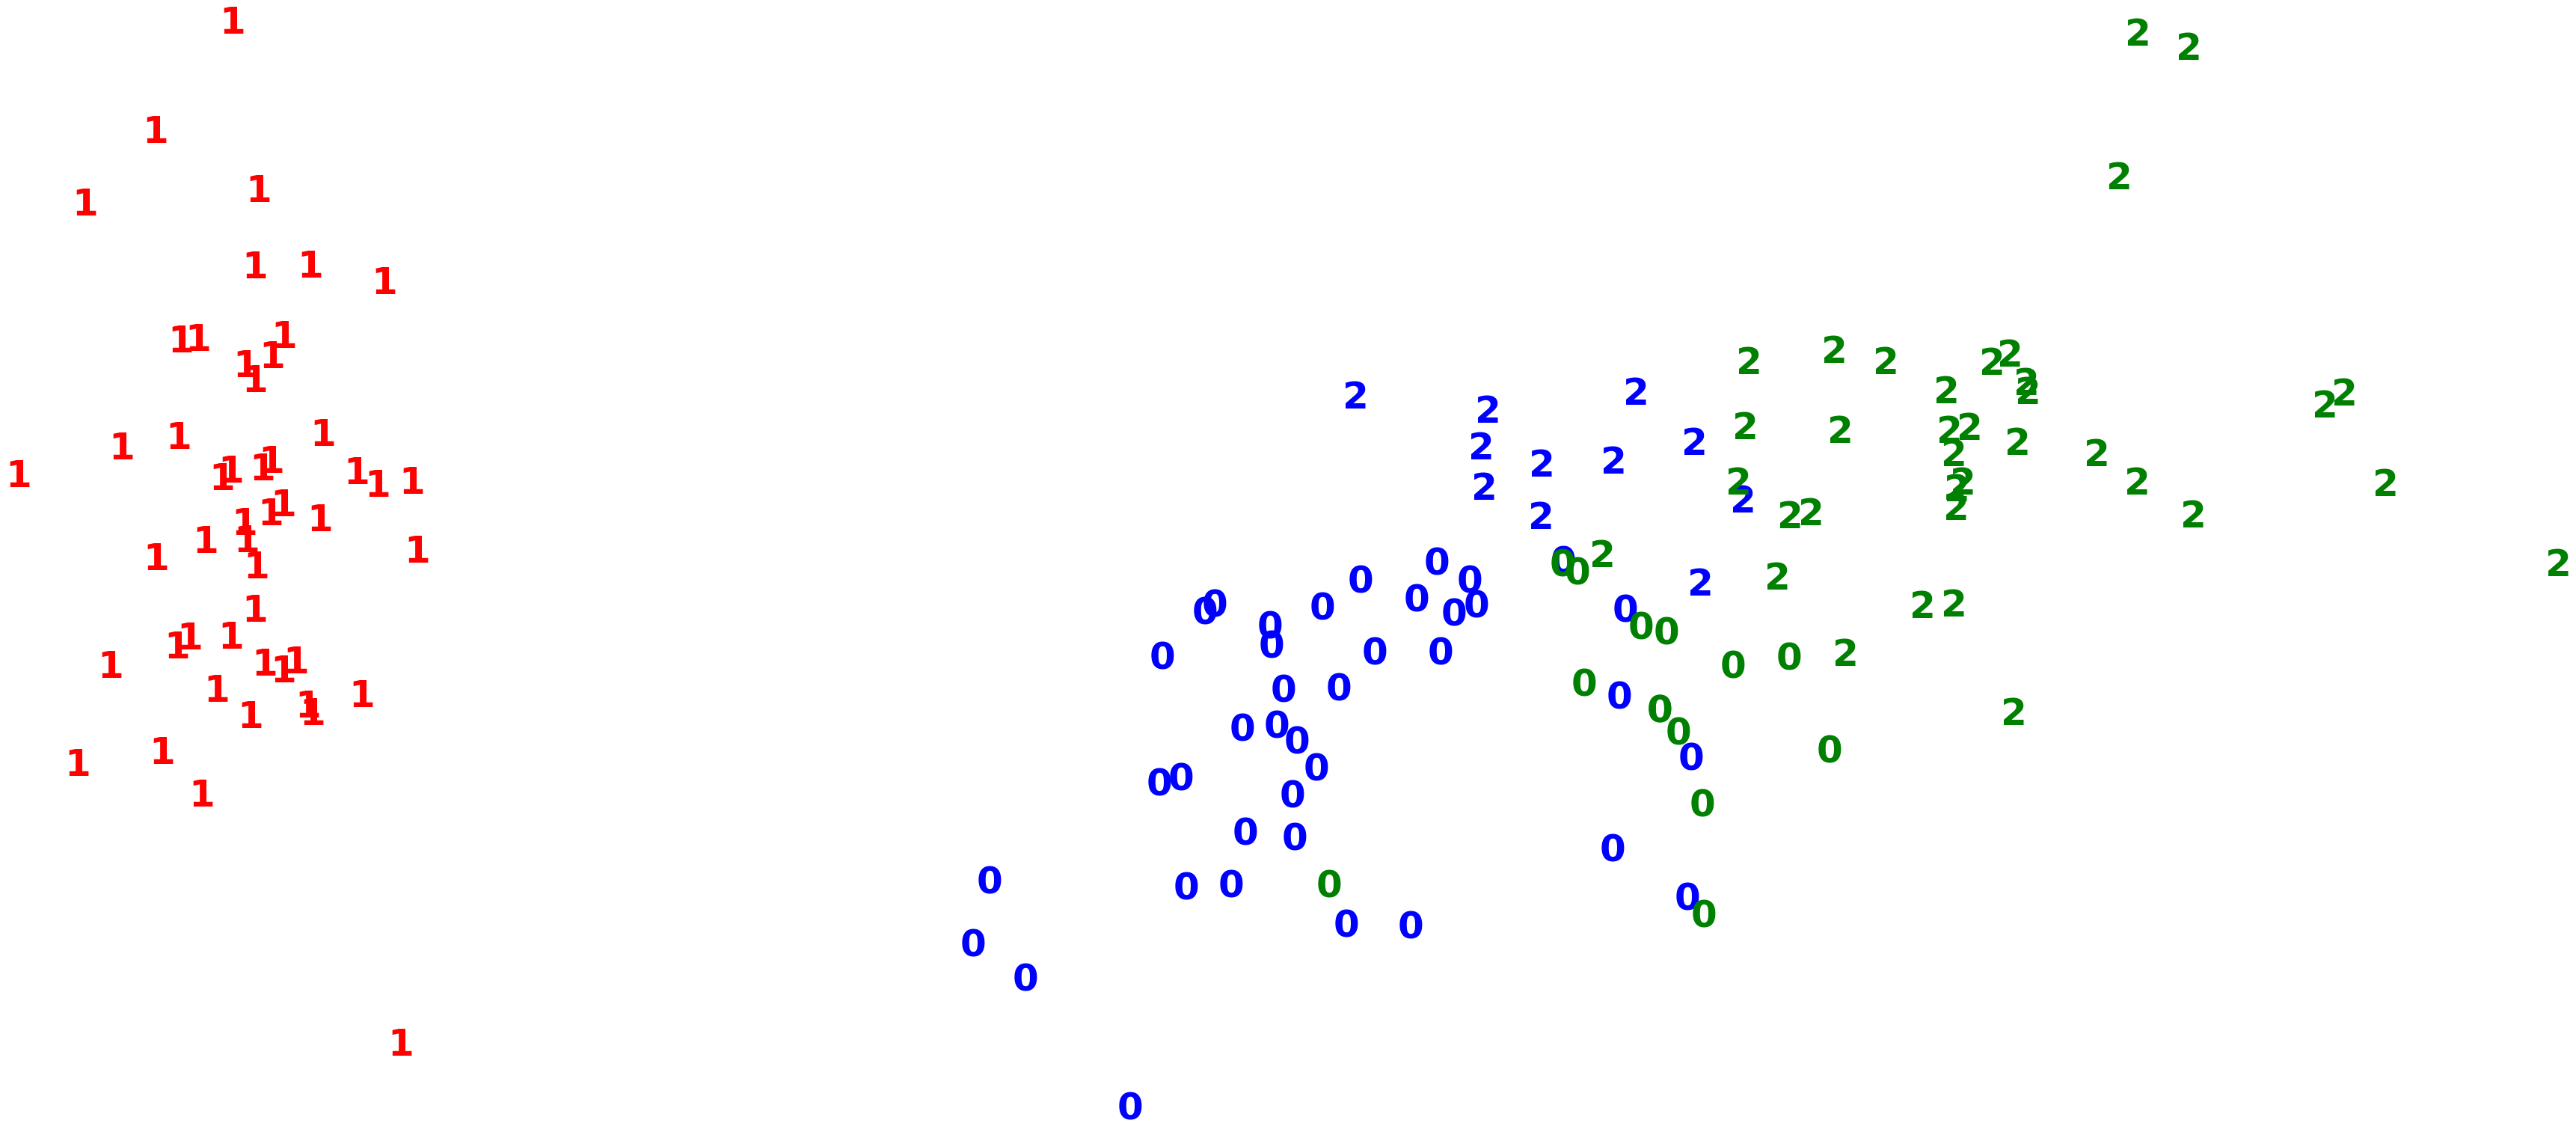

In [135]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Not bad! K-means seems to successfully identify the linearly separable class from the other two. However, for the inseparable two classes, the algorithm produced some incorrectly assigned predictions. 

Next, let's try mini-batch k-means:

9.11 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


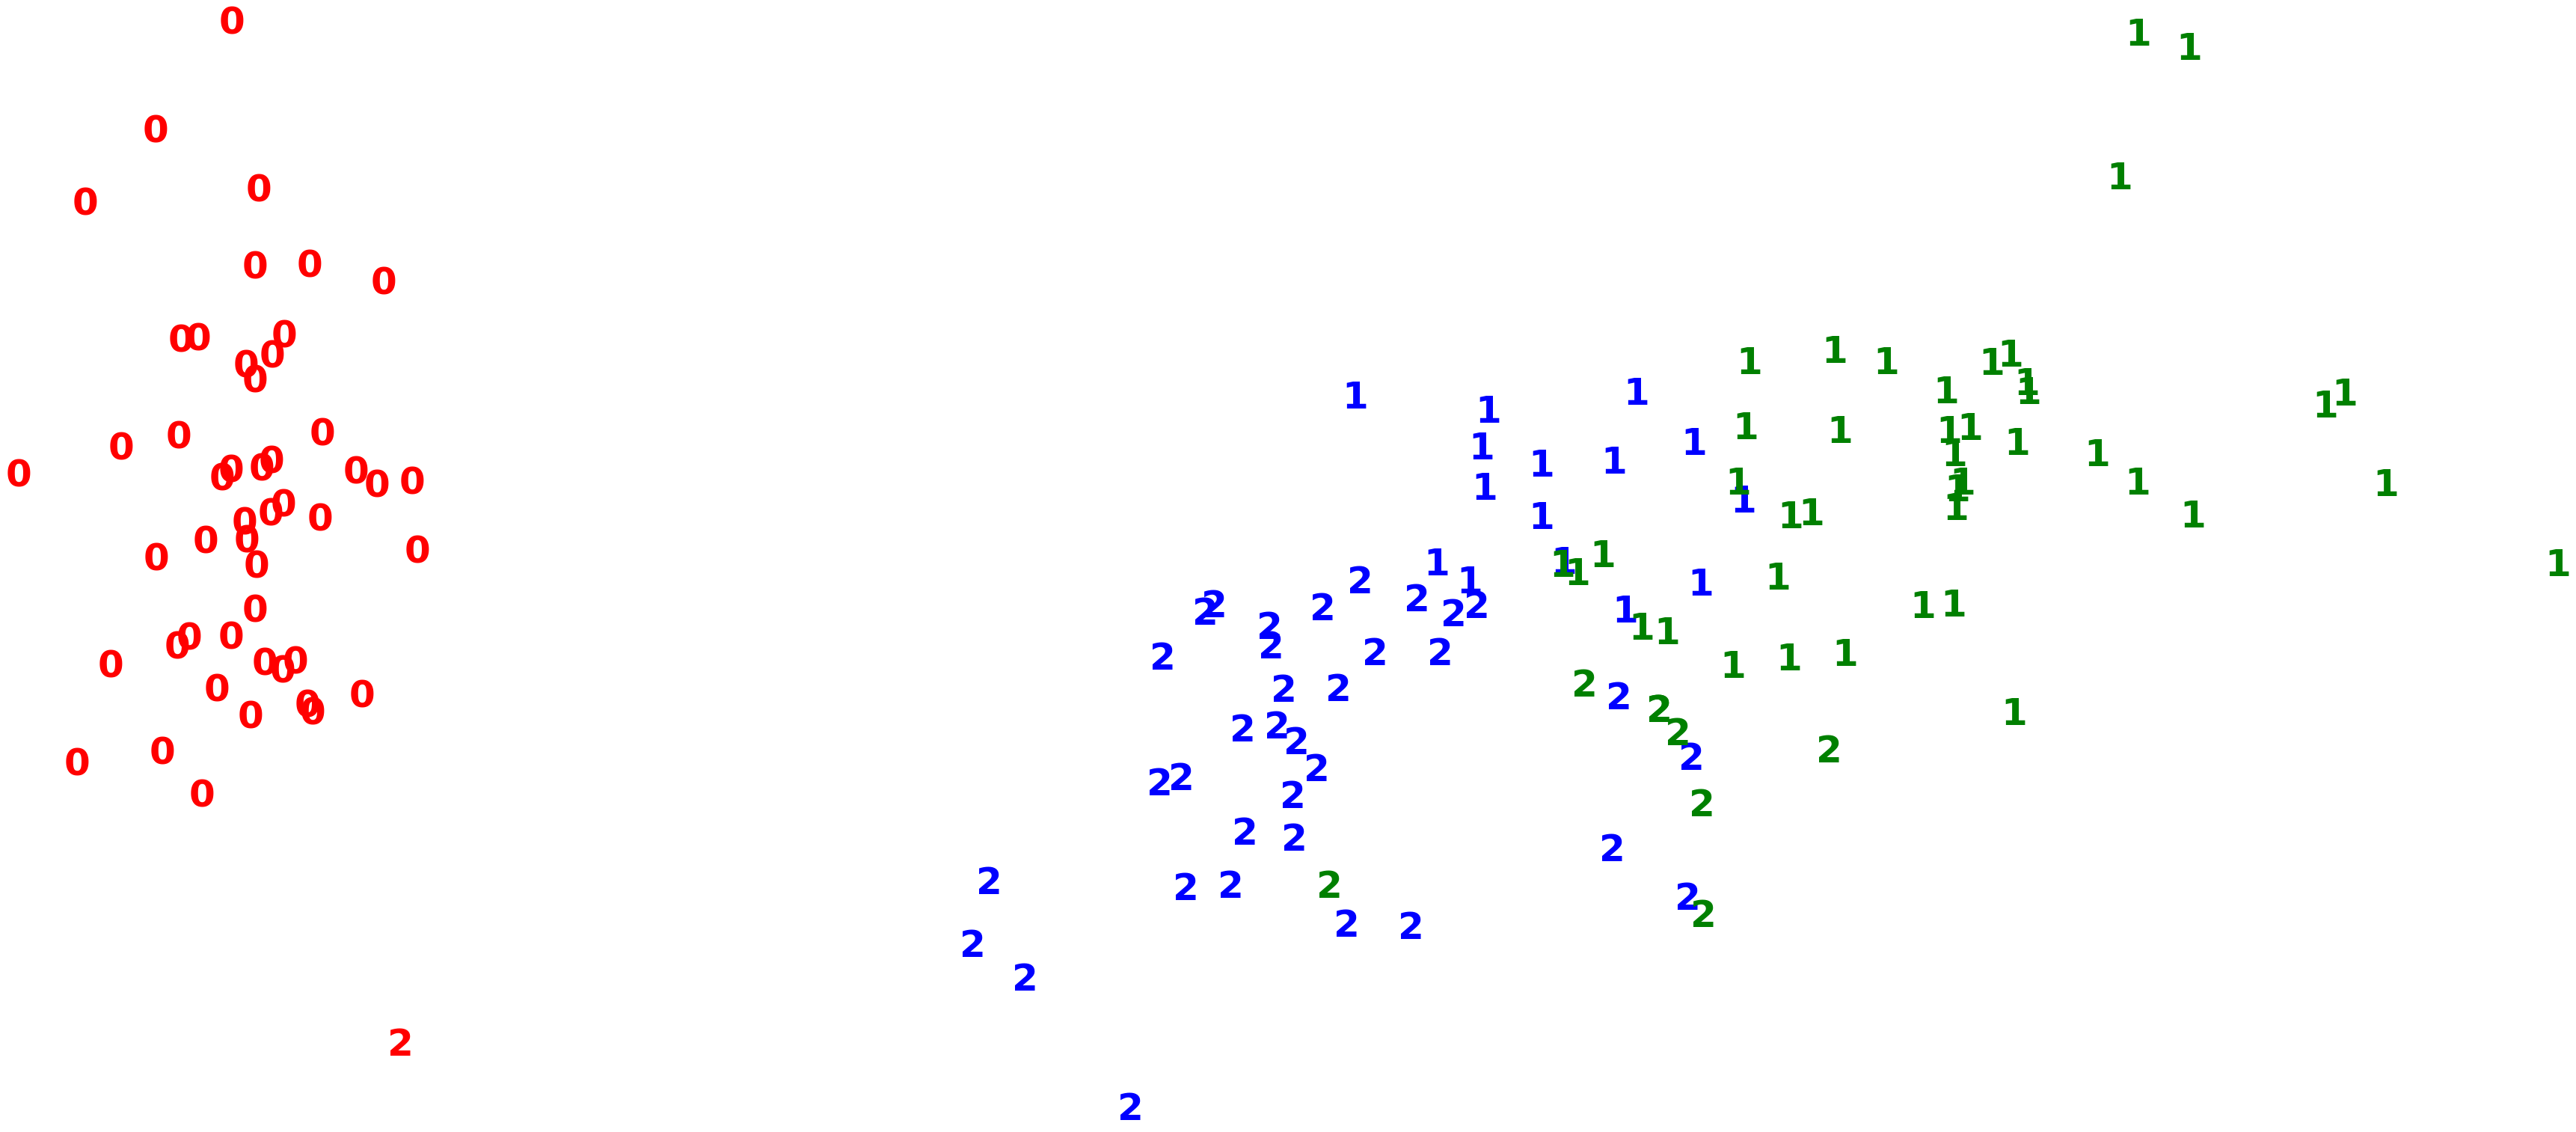

In [136]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Mini-batch k-means produced similar results but it was more than twice as fast.

# Assignment
To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-resources/blob/master/clustering_module_solutions/2.solution_kmeans.ipynb).

1. Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.

22.3 ms ± 889 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


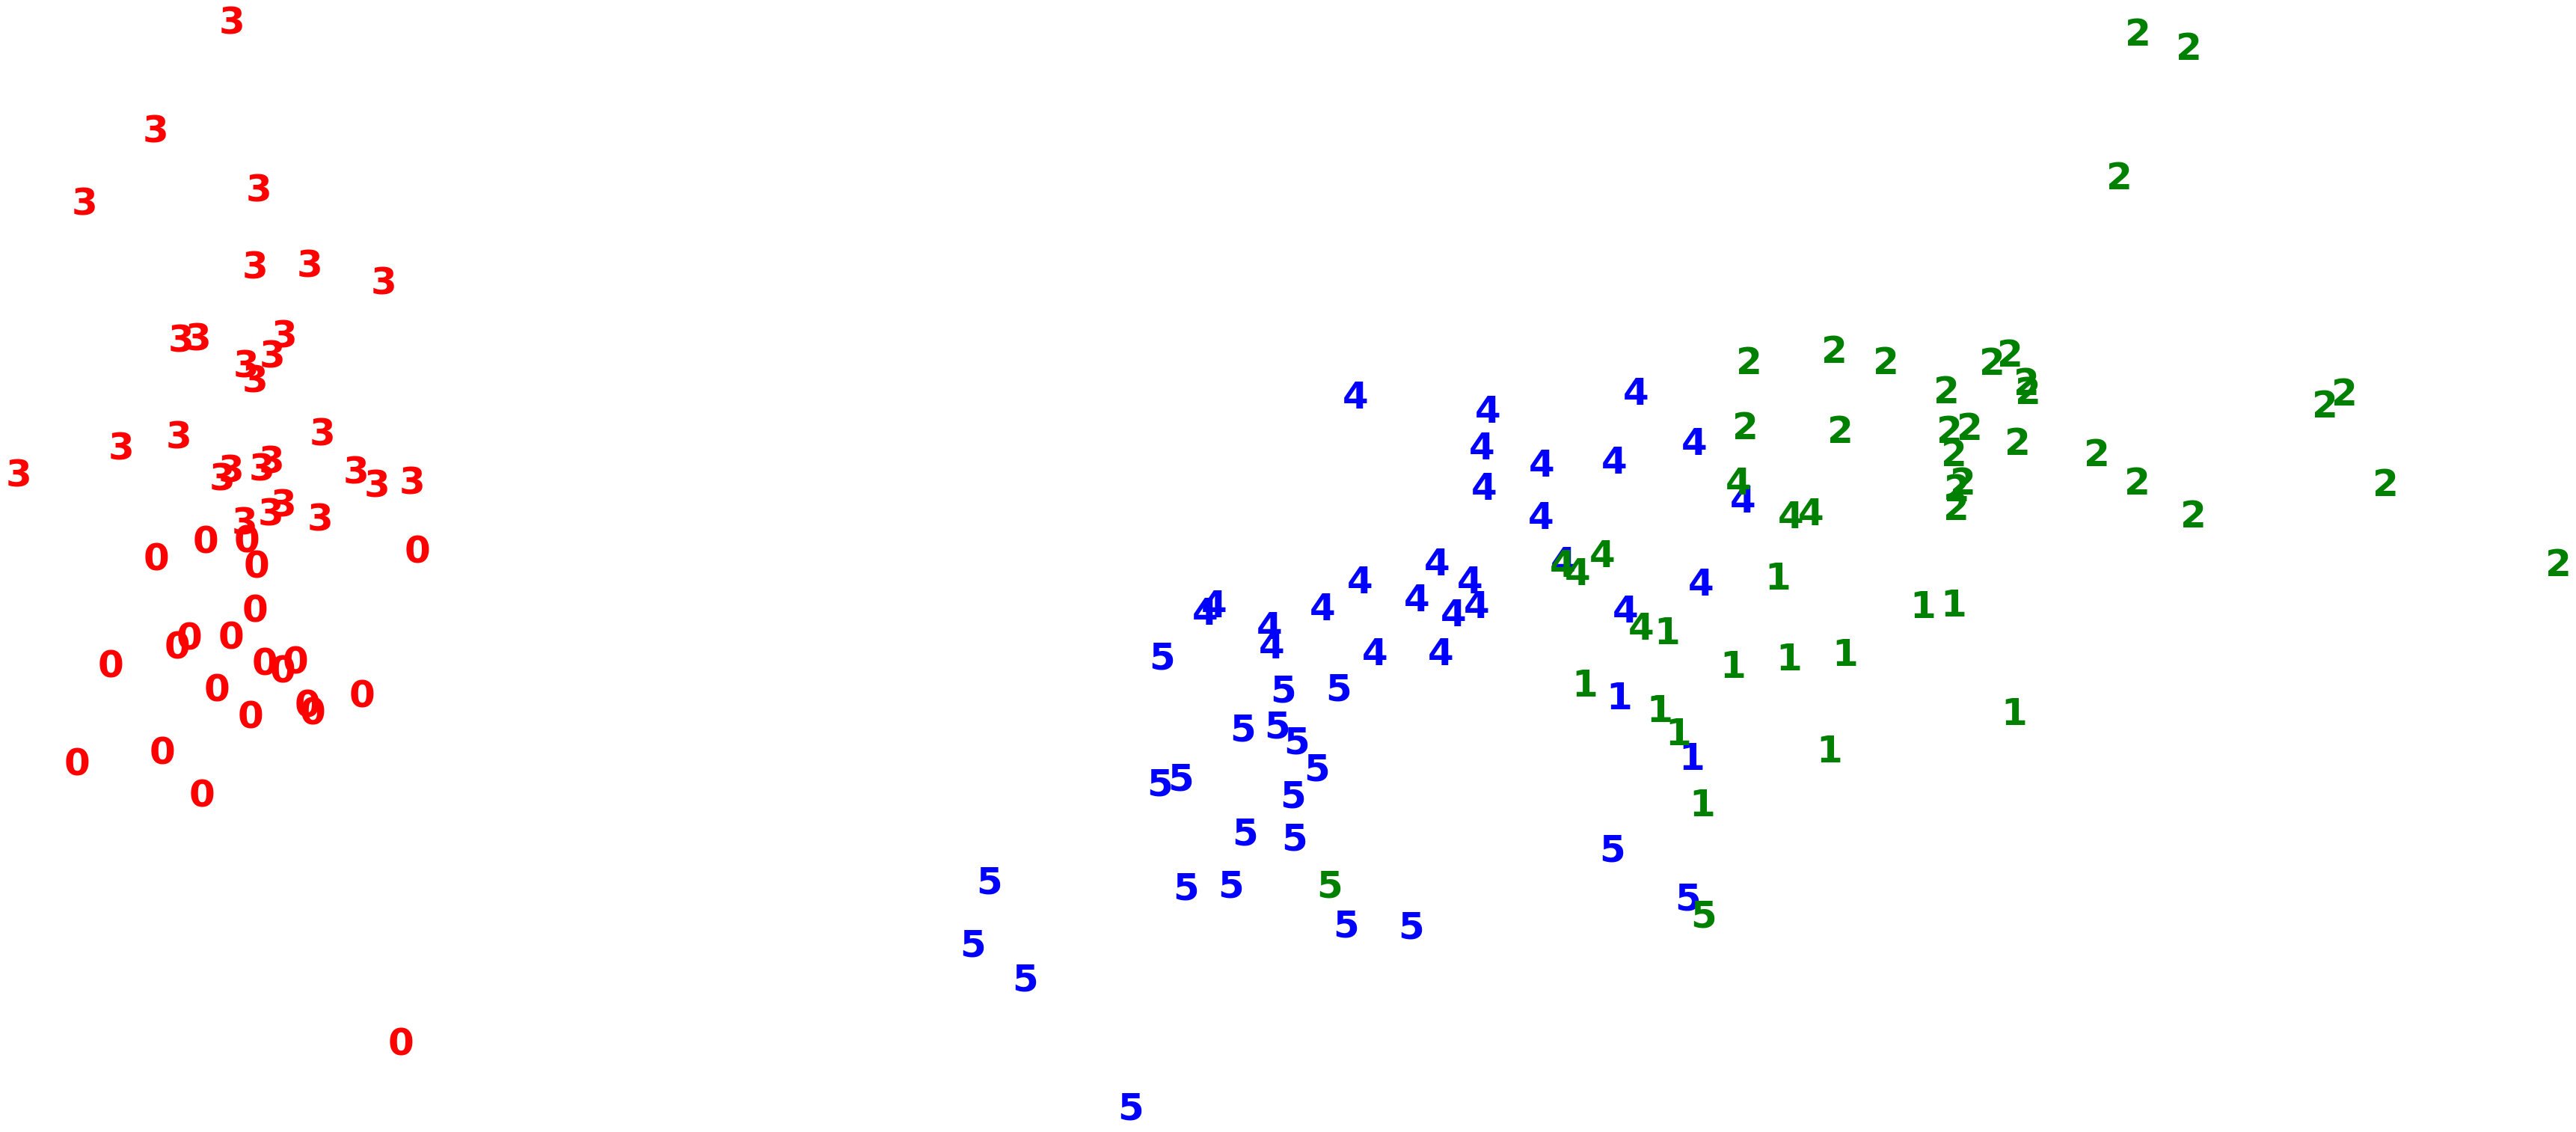

In [150]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=6, random_state=123)

# Fit model for standardized iris data
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

> With six clusters, it appears as if the cluster of `4` more accurately deliniates the blue group from the green group than three clusters did. You'll notice the separation between `4` and `2` on the upper portion of the scatterplot were predominantly labeled as `1`s in the three cluster model (scroll up to see). With a six cluster model, each class has two numbers within its domain and range (`0` and `3` for <font color='red'>red</font>, `4` and `5` for <font color='blue'>blue</font> and `1` and `2` for <font color='green'>green</font>). Keeping track of numbers like this could get tricky, though, so perhaps `n_clusters`<font color='purple'>=</font>`3` is still the best option.

2. In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

3. Load the dataset from the Thinkful's database. Here's the credentials you can use to connect to the database:

In [206]:
from sqlalchemy import create_engine
from sklearn.metrics import confusion_matrix

In [120]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

+ The dataset needs some preprocessing. So, apply the following code before working with the dataset:

In [138]:
# Define the features and the outcome
X_heart = heartdisease_df.iloc[:, :13]
y_heart = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X_heart = X_heart.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y_heart = np.where(y_heart > 0, 0, 1)

Here, `X_heart` will be your features and in `y_heart` we hold the labels. If `y_heart` is equal to 1, then it indicates that the corresponding patient has heart disease and if `y_heart` is equal to 0, then the patient doesn't have heart disease.

+ Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [153]:
X_heart.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0


In [155]:
y_heart

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [157]:
# Standarizing the features
scaler = StandardScaler()
X_heart_std = scaler.fit_transform(X_heart)

16 ms ± 55.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


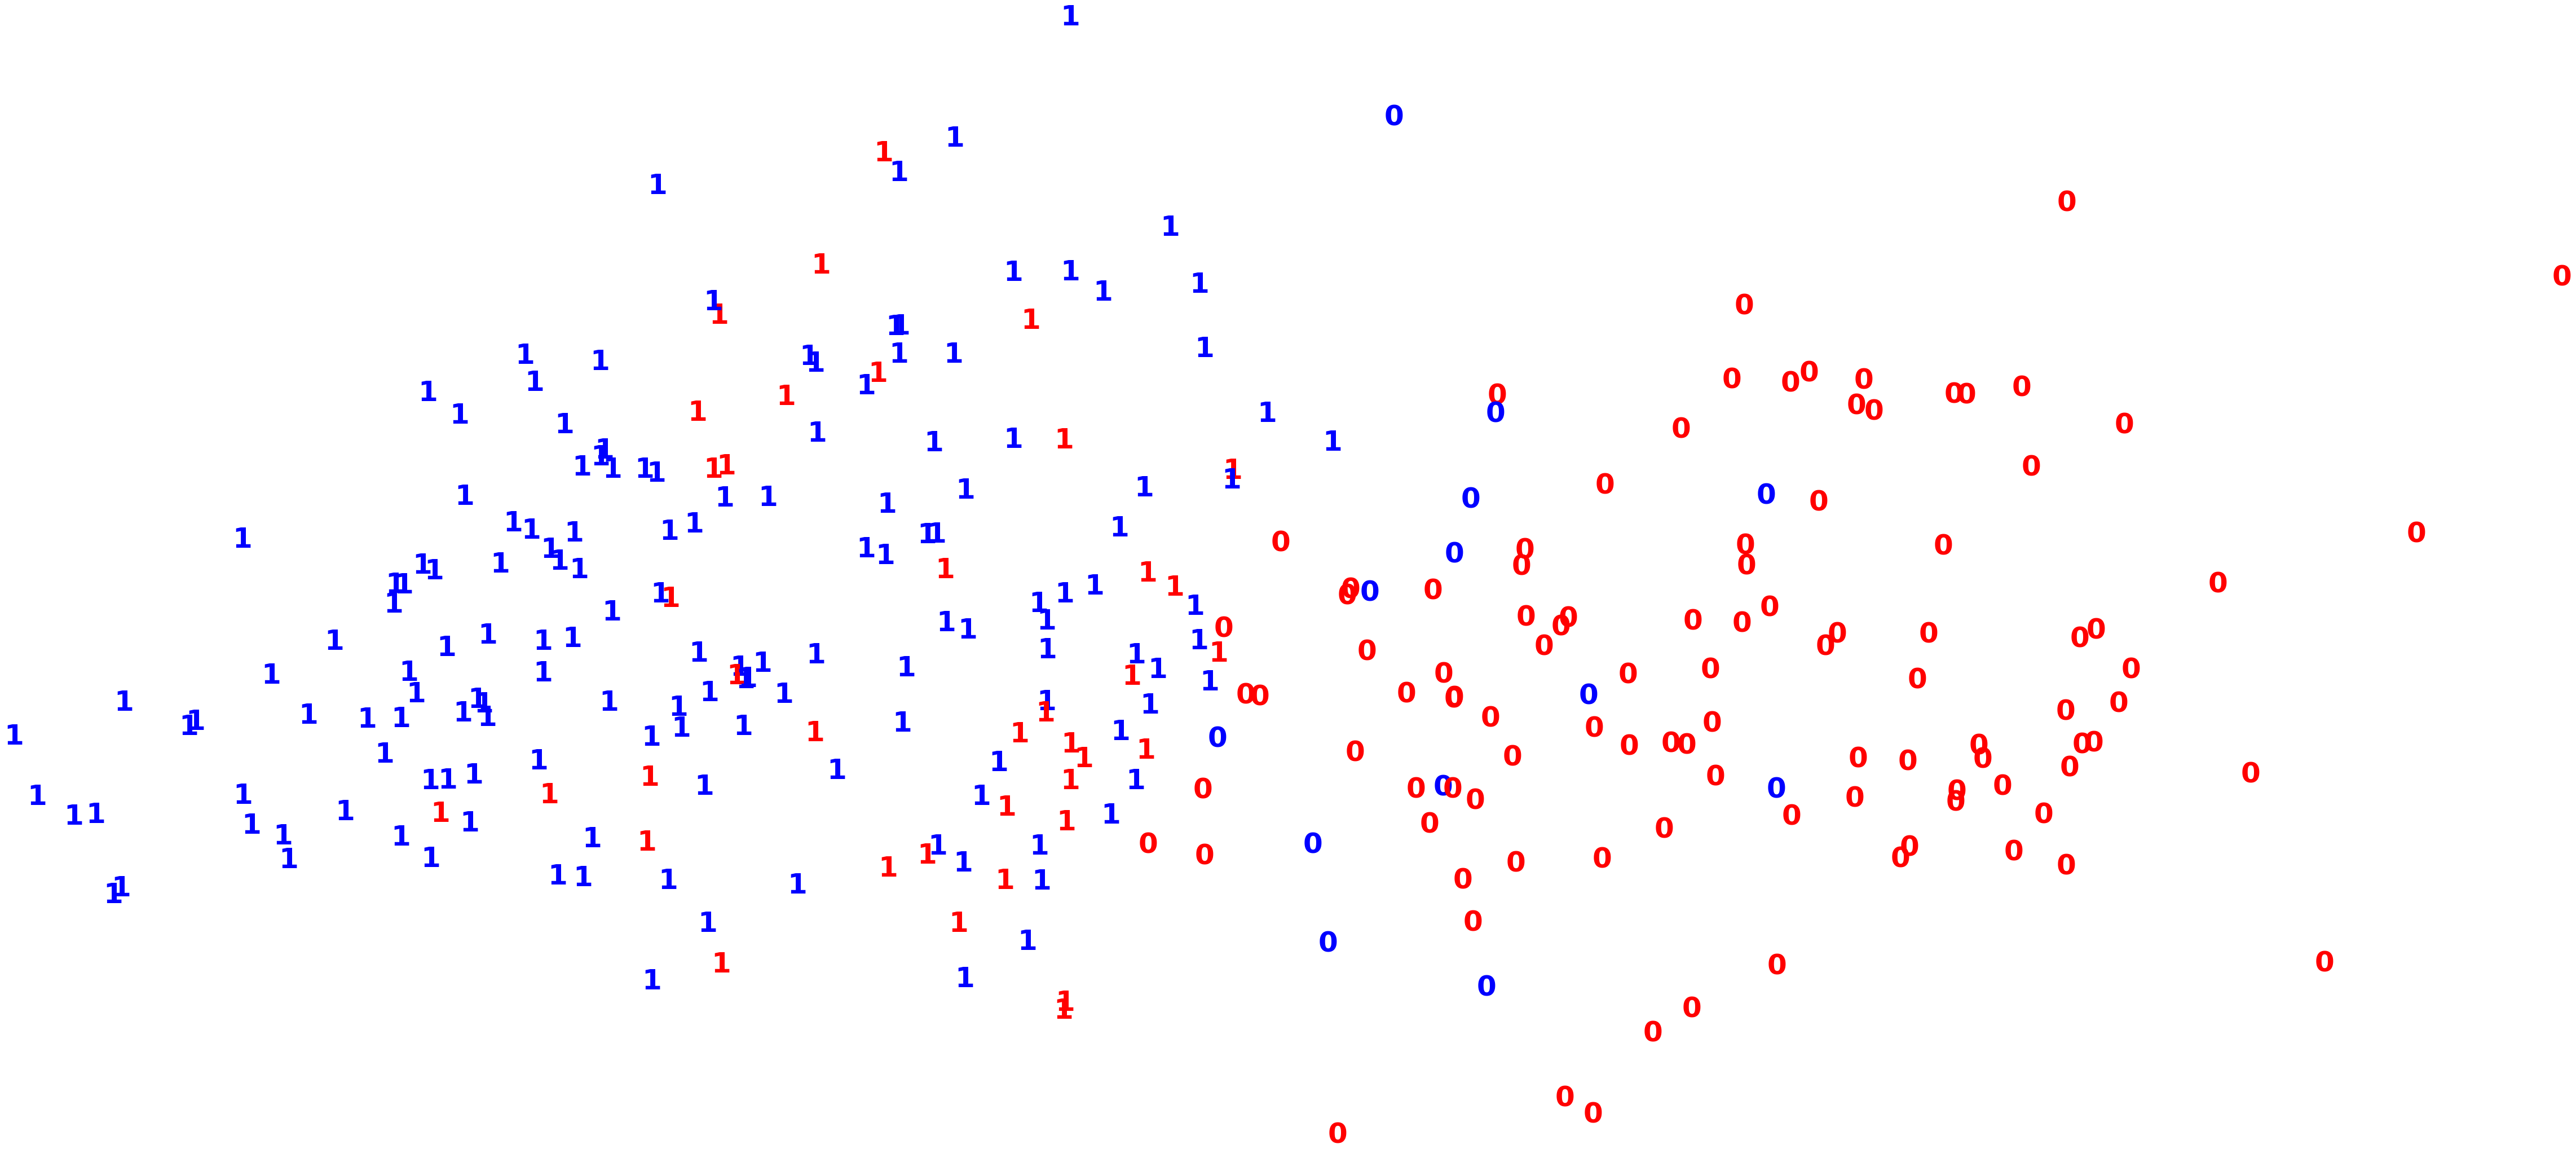

In [204]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=12)

# Fit model for standardized iris data
%timeit kmeans_cluster.fit(X_heart_std)
y_heart_pred = kmeans_cluster.predict(X_heart_std)

pca = PCA(n_components=2).fit_transform(X_heart_std)

plt.figure(figsize=(10,5))
colors = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_heart_pred[i]),
             color=colors[y_heart[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

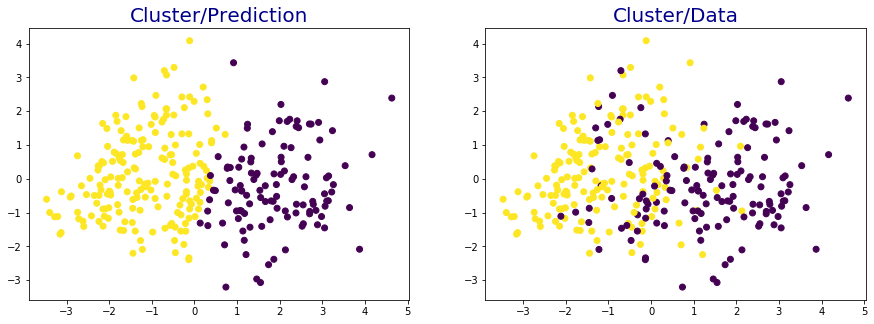

In [205]:
plt. figure(figsize=(15,5))

# Plot the PREDICTION.
plt.subplot(1,2,1)
plt.title('Cluster/Prediction', size=20, c='darkblue')
plt.scatter(pca[:,0], pca[:,1], c=y_heart_pred)

# Plot the ACTUAL DATA.
plt.subplot(1,2,2)
plt.title('Cluster/Data', size=20, c='darkblue')
plt.scatter(pca[:,0], pca[:,1], c=y_heart)
plt.show()

In [216]:
confusion_matrix(y_heart,y_heart_pred)

array([[101,  38],
       [ 13, 151]])

> You can see we're getting 252 classified correctly with only 51 classified incorrectly.